In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import scipy.signal
import IPython.display

from rlbase import misc
from rlbase.environment import MazeEnvironment
from rlbase.policy import EpsGreedy
from rlbase.agent import QlearningAgent
from rlbase.experiment import TD_CtrlExperiment,DynaQExperiment
from rlbase.policy_functions import *

<IPython.core.display.Javascript object>


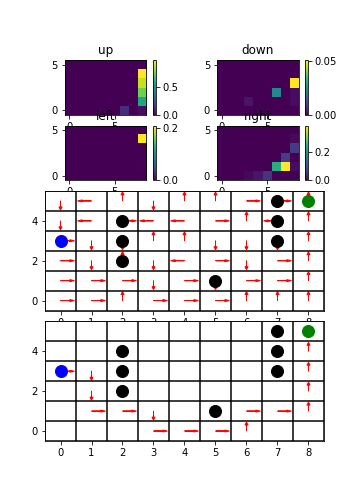

In [26]:
%matplotlib notebook

fig, _ = plt.subplots(6,2,figsize=(5,7))
def plot(i,episode):
  if i%5==0:
    plt.clf()
    x = [a[0][0] for a in episode] + [env.terminal_states[0][0]]
    y = [a[0][1] for a in episode] + [env.terminal_states[0][1]]
    
    for idx, di in enumerate(["up","down","left","right"]):
        plt.subplot(6,2,idx+1)
        r = {s: agent.q[s][di] for s in env.states}
        plt.imshow(np.transpose(np.flip(env.reshape(r),axis=1)),origin="lower")
        plt.colorbar()
        plt.title(di)
    best_action = {k:misc.argmax_unique(v) for (k,v) in agent.q.items()}
    
    arrow_length = .3
    
    plt.subplot(6,2,(5,8))
    for j in range(env.sx+1):
      plt.plot([j-.5,j-.5],[-.5,env.sy-.5],'k-')
    for j in range(env.sy+1):
      plt.plot([-.5,env.sx-.5],[j-.5,j-.5],'k-')
    for (k,v) in best_action.items():
      dx, dy = (0,0)
      if "right" in v:
        dx += arrow_length
      if "up" in v:
        dy += arrow_length
      if "left" in v:
        dx -= arrow_length
      if "down" in v:
        dy -= arrow_length
      plt.arrow(k[0],k[1],dx,dy,color="r",head_width=0.1)
    plt.xlim(-.5,env.sx-.5)
    plt.ylim(-.5,env.sy-.5)
    plt.plot(env.start[0],env.start[1],"ob",markersize=12)
    for (x,y) in env.wall:
        plt.plot(x,y,"ok",markersize=12)
    plt.plot(env.terminal_states[0][0],env.terminal_states[0][1],"og",markersize=12)
    
    plt.subplot(6,2,(9,12))
    plt.plot(x,y,'-xk')
    for j in range(env.sx+1):
      plt.plot([j-.5,j-.5],[-.5,env.sy-.5],'k-')
    for j in range(env.sy+1):
      plt.plot([-.5,env.sx-.5],[j-.5,j-.5],'k-')
    for a in episode:
      dx, dy = (0,0)
      if "right" in a[1]:
        dx += arrow_length
      if "up" in a[1]:
        dy += arrow_length
      if "left" in a[1]:
        dx -= arrow_length
      if "down" in a[1]:
        dy -= arrow_length
      plt.arrow(a[0][0],a[0][1],dx,dy,color="r",head_width=0.1)
    plt.xlim(-.5,env.sx-.5)
    plt.ylim(-.5,env.sy-.5)
    plt.plot(env.start[0],env.start[1],"ob",markersize=12)
    for (x,y) in env.wall:
        plt.plot(x,y,"ok",markersize=12)
    plt.plot(env.terminal_states[0][0],env.terminal_states[0][1],"og",markersize=12)
    
    fig.canvas.draw()

env = MazeEnvironment(diagonal=False,stay=False)
pi = EpsGreedy(env=env,eps=0.1)
agent = QlearningAgent(env=env,pi=pi,alpha=0.1)
exp = TD_CtrlExperiment(env=env,agent=agent,n_episodes=50,callback=plot,gamma=0.95,show_progress=False)
exp.train()

<IPython.core.display.Javascript object>


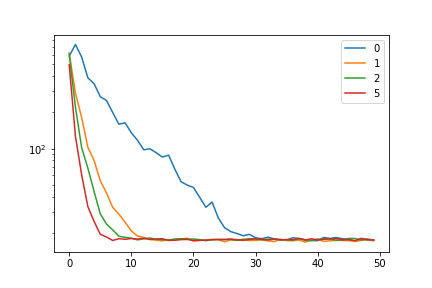

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [33]:
%matplotlib notebook

n_episodes = 50
n_runs = 100
arr_n_plan = [0,1,2,5]

def data(i,episode):
  global tmp
  tmp[i] += len(episode)

env = MazeEnvironment(diagonal=False,stay=False)
plt.figure()
lens = {}
for n_plan in arr_n_plan:
    tmp = [0]*n_episodes
    for i in tqdm(range(n_runs)):
        pi = EpsGreedy(env=env,eps=0.1)
        agent = QlearningAgent(env=env,pi=pi,alpha=0.1)
        exp = DynQExperiment(env=env,agent=agent,n_episodes=n_episodes,callback=data,gamma=0.95,show_progress=False,n=n_plan)
        exp.train()
    lens[n] = [i/n_runs for i in tmp]
    plt.semilogy(lens[n])
plt.legend([str(i) for i in arr_n_plan])
